Zadanie: przy użyciu danych stwórz model klasyfikacji (może być więcej niż jeden) przewidujący szansę na przetransportowania do innego wymiaru na kosmicznym Titanicu.

Elementy, które chcę żebyście zawarli w Waszych pracach:
1. EDA
2. Trenowanie + ewaluacja + testowanie => w tym celu wykorzystajcie plik space_titanic_train.csv
3. Predykcja => w tym celu wykorzystajcie plik space_titanic_test.csv
4. Za pomocą metryk omawianych na zajęciach wybierz najlepszy model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
uploaded = files.upload()

Saving space_titanic_test.csv to space_titanic_test.csv
Saving space_titanic_train.csv to space_titanic_train.csv


In [3]:
st_test = pd.read_csv('space_titanic_test.csv')
st_train = pd.read_csv('space_titanic_train.csv')


◦	PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

◦	HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

◦	CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

◦	Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

◦	Destination - The planet the passenger will be debarking to.

◦	Age - The age of the passenger.

◦	VIP - Whether the passenger has paid for special VIP service during the voyage.

◦	RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

◦	Name - The first and last names of the passenger.

◦	Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

EDA dla train

In [4]:
st_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
st_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
st_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
print(st_train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=True).mean().sort_values(by='Transported', ascending=False))
print(st_train[['VIP', 'Transported']].groupby(['VIP'], as_index=True).mean().sort_values(by='Transported', ascending=False))
print(st_train[['Destination', 'Transported']].groupby(['Destination'], as_index=True).mean().sort_values(by='Transported', ascending=False))
print(st_train[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=True).mean().sort_values(by='Transported', ascending=False))


            Transported
HomePlanet             
Europa         0.658846
Mars           0.523024
Earth          0.423946
       Transported
VIP               
False     0.506332
True      0.381910
               Transported
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.471175
           Transported
CryoSleep             
True          0.817583
False         0.328921


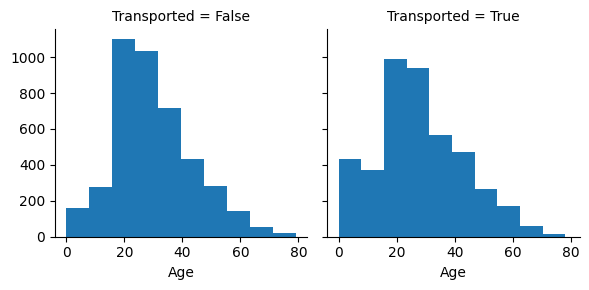

In [8]:
g = sns.FacetGrid(st_train, col='Transported')
g.map(plt.hist, 'Age', bins=10)

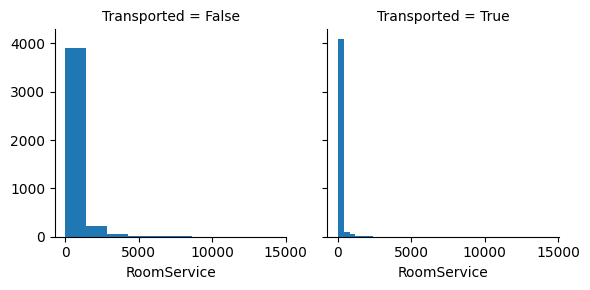

In [9]:
g = sns.FacetGrid(st_train, col='Transported')
g.map(plt.hist, 'RoomService', bins=10)

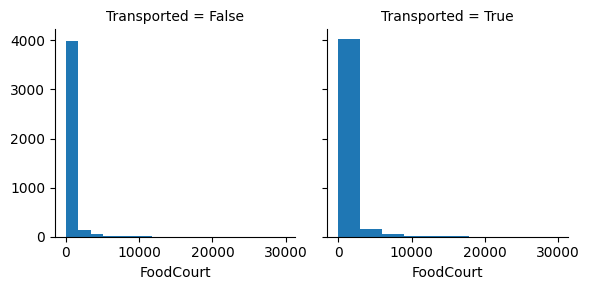

In [10]:
g = sns.FacetGrid(st_train, col='Transported')
g.map(plt.hist, 'FoodCourt', bins=10)

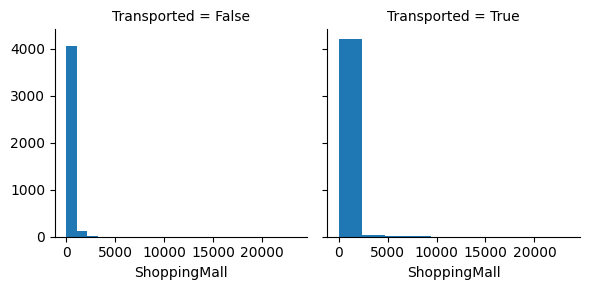

In [11]:
g = sns.FacetGrid(st_train, col='Transported')
g.map(plt.hist, 'ShoppingMall', bins=10)

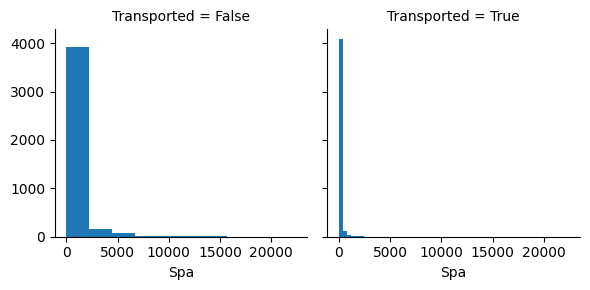

In [12]:
g = sns.FacetGrid(st_train, col='Transported')
g.map(plt.hist, 'Spa', bins=10)

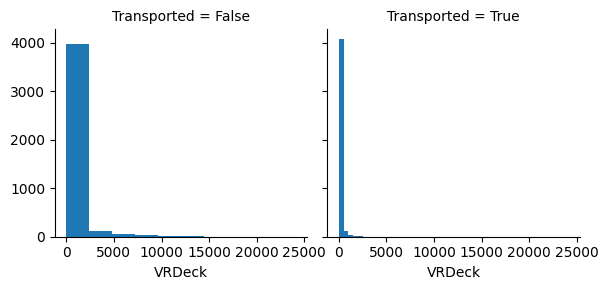

In [13]:
g = sns.FacetGrid(st_train, col='Transported')
g.map(plt.hist, 'VRDeck', bins=10)

In [14]:
st_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Określenie x i y

In [15]:
y = st_train["Transported"].copy()
X = st_train.drop(["Transported","Name","Cabin","PassengerId"],axis=1).copy()

In [16]:
X.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Zastępywanie wartości null

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
dtypes: float64(6), object(4)
memory usage: 679.3+ KB


In [19]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputerE = imputerE.fit(X[['Destination']])
X[['Destination']] = imputerE.transform(X[['Destination']])

In [20]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputerE = imputerE.fit(X[['CryoSleep']])
X[['CryoSleep']] = imputerE.transform(X[['CryoSleep']])

In [21]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputerE = imputerE.fit(X[['HomePlanet']])
X[['HomePlanet']] = imputerE.transform(X[['HomePlanet']])

In [22]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputerE = imputerE.fit(X[['VIP']])
X[['VIP']] = imputerE.transform(X[['VIP']])

In [23]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X[['Age']])
X[['Age']] = imputerE.transform(X[['Age']])

In [24]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X[['RoomService']])
X[['RoomService']] = imputerE.transform(X[['RoomService']])

In [25]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X[['FoodCourt']])
X[['FoodCourt']] = imputerE.transform(X[['FoodCourt']])

In [26]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X[['ShoppingMall']])
X[['ShoppingMall']] = imputerE.transform(X[['ShoppingMall']])

In [27]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X[['Spa']])
X[['Spa']] = imputerE.transform(X[['Spa']])

In [28]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X[['VRDeck']])
X[['VRDeck']] = imputerE.transform(X[['VRDeck']])

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
dtypes: float64(6), object(4)
memory usage: 679.3+ KB


Enkodowanie do wartości 0-1

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[['HomePlanet']])
transformed_home = enc.transform(X[['HomePlanet']]).toarray()
home_df = pd.DataFrame(transformed_home,columns=enc.get_feature_names_out(["HomePlanet"]))

In [32]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[['CryoSleep']])
transformed_cs = enc.transform(X[['CryoSleep']]).toarray()
cs_df = pd.DataFrame(transformed_cs,columns=enc.get_feature_names_out(["CryoSleep"]))

In [33]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[['Destination']])
transformed_dest = enc.transform(X[['Destination']]).toarray()
dest_df = pd.DataFrame(transformed_dest,columns=enc.get_feature_names_out(["Destination"]))

In [34]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X[['VIP']])
transformed_vip = enc.transform(X[['VIP']]).toarray()
vip_df = pd.DataFrame(transformed_vip,columns=enc.get_feature_names_out(["VIP"]))

Skalowanie danych

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
mm_age = MinMaxScaler()
age_minmax = mm_age.fit_transform(X[["Age"]])
X["Age"] = age_minmax

In [38]:
mm_room= MinMaxScaler()
room_minmax = mm_room.fit_transform(X[["RoomService"]])
X["RoomService"] = room_minmax

In [39]:
mm_food = MinMaxScaler()
food_minmax = mm_food.fit_transform(X[["FoodCourt"]])
X["FoodCourt"] = food_minmax

In [40]:
mm_shop = MinMaxScaler()
shop_minmax = mm_shop.fit_transform(X[["ShoppingMall"]])
X["ShoppingMall"] = shop_minmax

In [41]:
mm_spa = MinMaxScaler()
spa_minmax = mm_spa.fit_transform(X[["Spa"]])
X["Spa"] = spa_minmax

In [42]:
mm_vr = MinMaxScaler()
vr_minmax = mm_vr.fit_transform(X[["VRDeck"]])
X["VRDeck"] = vr_minmax

Zakodowane i zeskalowane dane podmieniamy w x i y

In [43]:
X_transformed = X.copy()
X_transformed = X_transformed.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], axis=1)
X_transformed = pd.concat([X_transformed, home_df, cs_df, dest_df, vip_df], axis=1)
X_transformed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Uczenie modelu, model regresji, ewaluacja modelu

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [45]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_prop = clf.predict_proba(X_test)

In [46]:
y_pred[0]

np.False_

In [47]:
clf.score(X_test, y_test)

0.7473159509202454

Metryki

In [48]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_score

In [49]:
confusion_matrix(y_test,y_pred)

array([[1041,  248],
       [ 411,  908]])

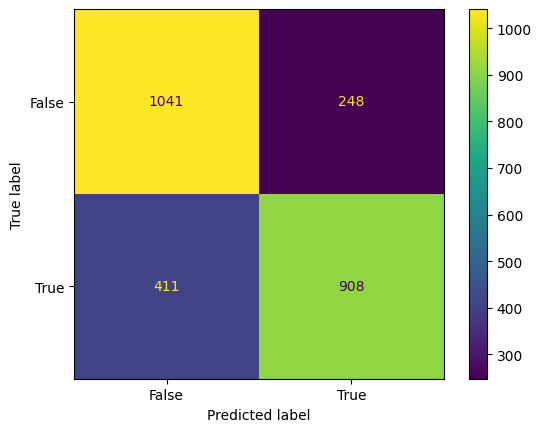

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred),display_labels=clf.classes_)
disp.plot()
plt.show()

In [51]:
print("Recall score: ", recall_score(y_test,y_pred))
print("Precision score: ", precision_score(y_test,y_pred))
print("F1 score: ", f1_score(y_test,y_pred))

Recall score:  0.6884003032600455
Precision score:  0.7854671280276817
F1 score:  0.7337373737373737


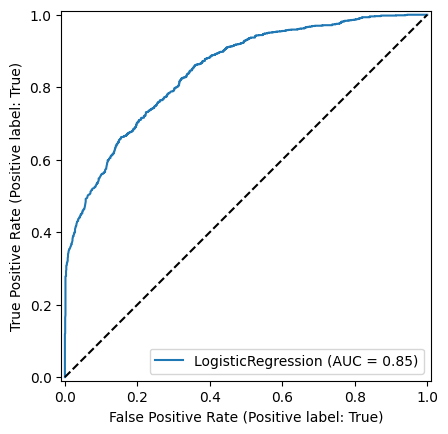

In [52]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.show()

Cross walidacja i grid search

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
scores = cross_val_score(clf, X_train, y_train, cv=10)

In [54]:
print(scores)

[0.75205255 0.75205255 0.7816092  0.7635468  0.75369458 0.75986842
 0.75657895 0.74342105 0.76809211 0.78947368]


In [55]:
print(scores)
print(scores.mean())
print(scores.std())

[0.75205255 0.75205255 0.7816092  0.7635468  0.75369458 0.75986842
 0.75657895 0.74342105 0.76809211 0.78947368]
0.7620389875550946
0.013508543298308239


In [56]:
from sklearn.model_selection import GridSearchCV


grid={"C":np.logspace(-3,3,7), "penalty":["l2"],"class_weight":['balanced',None]}# l1 lasso l2 ridge
# grid={"C":[0.9,0.95,1,1.05,1.1], "penalty":["l1", "l2", "elasticnet", None],"class_weight":['balanced',None]}# l1 lasso l2 ridge
# grid={"C":[0.1,1,5,10], "penalty":["l2"],"class_weight":['balanced',None]}# l1 lasso l2 ridge
# grid={"C":[0.9,0.95,1,1.05,1.1], "penalty":["l2"],"class_weight":['balanced',None]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1000.0), 'class_weight': None, 'penalty': 'l2'}
accuracy : 0.7899760176302826


Różne modele

In [57]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)
svc = SVC(random_state=0).fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [59]:
print("RandomForestClassifier")
print("Recall score: ", recall_score(y_test,y_pred_rfc))
print("Precision score: ", precision_score(y_test,y_pred_rfc))
print("F1 score: ", f1_score(y_test,y_pred_rfc))
print("\n")
print("SVC")
print("Recall score: ", recall_score(y_test,y_pred_svc))
print("Precision score: ", precision_score(y_test,y_pred_svc))
print("F1 score: ", f1_score(y_test,y_pred_svc))
print("\n")
print("GaussianNB")
print("Recall score: ", recall_score(y_test,y_pred_gnb))
print("Precision score: ", precision_score(y_test,y_pred_gnb))
print("F1 score: ", f1_score(y_test,y_pred_gnb))
print("\n")
print("KNeighborsClassifier")
print("Recall score: ", recall_score(y_test,y_pred_knn))
print("Precision score: ", precision_score(y_test,y_pred_knn))
print("F1 score: ", f1_score(y_test,y_pred_knn))
print("\n")

RandomForestClassifier
Recall score:  0.7952994692949203
Precision score:  0.7764618800888231
F1 score:  0.7857677902621722


SVC
Recall score:  0.6679302501895376
Precision score:  0.7915543575920935
F1 score:  0.7245065789473685


GaussianNB
Recall score:  0.913570887035633
Precision score:  0.6743144935646335
F1 score:  0.7759175788795879


KNeighborsClassifier
Recall score:  0.7808946171341926
Precision score:  0.7567964731814842
F1 score:  0.7686567164179104




Wychodzi na to że największy f1 score jest przy Random Forest Classifier

In [61]:
rfc_cv = RandomForestClassifier()
svc_cv = SVC()
gnb_cv = GaussianNB()
knn_cv = KNeighborsClassifier()
logr_cv = LogisticRegression()

models = [rfc_cv,svc_cv,gnb_cv,knn_cv,logr_cv]

for i in models:
  scores = cross_val_score(i, X_train, y_train, cv=10)
  print(i,": with mean ",scores.mean()," and std ",scores.std())


RandomForestClassifier() : with mean  0.7814347290640393  and std  0.013860394047839413
SVC() : with mean  0.7541515426497278  and std  0.013273606032004375
GaussianNB() : with mean  0.7319705513784461  and std  0.019082235779127824
KNeighborsClassifier() : with mean  0.7556312656641604  and std  0.012556508482563847
LogisticRegression() : with mean  0.7620389875550946  and std  0.013508543298308239


In [62]:
grid = {
    'max_depth': [5,8,10],
    'max_features': ['sqrt', 'log2',None,5],
    'n_estimators': [100, 200,500]
}
rfc_grid = RandomForestClassifier()
rfc_grid_cv=GridSearchCV(rfc_grid,grid,cv=10)
rfc_grid_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",rfc_grid_cv.best_params_)
print("accuracy :",rfc_grid_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
accuracy : 0.7958978804770547


In [65]:
rfc_grid_finalv1 = RandomForestClassifier(max_depth=5, max_features = 'log2', n_estimators = 500,random_state = 3)
rfc_grid_finalv2 = RandomForestClassifier(max_depth=8, max_features = 'sqrt', n_estimators = 100,random_state = 3)
rfc_grid_finalv3 = RandomForestClassifier(max_depth=10, max_features = 'log2', n_estimators = 100,random_state = 3)
rfc_grid_finalv4 = RandomForestClassifier(max_depth=8, n_estimators=500, random_state=3,criterion = 'entropy')

rfc_grid_final_vanilla = RandomForestClassifier(random_state=3)

models = [rfc_grid_finalv1, rfc_grid_finalv2, rfc_grid_finalv3, rfc_grid_finalv4, rfc_grid_final_vanilla]

for i in models:
  scores = cross_val_score(i, X_train, y_train, cv=10)
  print(i,": with mean ",scores.mean()," and std ",scores.std())

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=500,
                       random_state=3) : with mean  0.782747277676951  and std  0.014426813624600703
RandomForestClassifier(max_depth=8, random_state=3) : with mean  0.7935936284677212  and std  0.012706141583926614
RandomForestClassifier(max_depth=10, max_features='log2', random_state=3) : with mean  0.7965546949269726  and std  0.014425920001133331
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=3) : with mean  0.7947446741854638  and std  0.012379832867954852
RandomForestClassifier(random_state=3) : with mean  0.7816002830351741  and std  0.015008954778985823


In [66]:
for i in models:
  print(i)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=500,
                       random_state=3)
RandomForestClassifier(max_depth=8, random_state=3)
RandomForestClassifier(max_depth=10, max_features='log2', random_state=3)
RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=3)
RandomForestClassifier(random_state=3)


In [97]:
best_class = RandomForestClassifier(max_depth = 10, max_features = 'log2', n_estimators = 100)
best_class.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2')

Finalny (ten najlepszy) model

przygotowanie danych ze zbioru test tak samo jak zbiór treningowy

In [67]:
st_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [70]:
X_final = st_test.drop(["Name","Cabin","PassengerId"],axis=1).copy()

In [72]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Destination   4277 non-null   object 
 3   Age           4186 non-null   float64
 4   VIP           4184 non-null   object 
 5   RoomService   4195 non-null   float64
 6   FoodCourt     4171 non-null   float64
 7   ShoppingMall  4179 non-null   float64
 8   Spa           4176 non-null   float64
 9   VRDeck        4197 non-null   float64
dtypes: float64(6), object(4)
memory usage: 334.3+ KB


In [71]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputerE = imputerE.fit(X_final[['Destination']])
X_final[['Destination']] = imputerE.transform(X_final[['Destination']])

In [73]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputerE = imputerE.fit(X_final[['HomePlanet']])
X_final[['HomePlanet']] = imputerE.transform(X_final[['HomePlanet']])

In [74]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputerE = imputerE.fit(X_final[['CryoSleep']])
X_final[['CryoSleep']] = imputerE.transform(X_final[['CryoSleep']])

In [75]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputerE = imputerE.fit(X_final[['VIP']])
X_final[['VIP']] = imputerE.transform(X_final[['VIP']])

In [76]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X_final[['Age']])
X_final[['Age']] = imputerE.transform(X_final[['Age']])

In [77]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X_final[['RoomService']])
X_final[['RoomService']] = imputerE.transform(X_final[['RoomService']])

In [78]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X_final[['FoodCourt']])
X_final[['FoodCourt']] = imputerE.transform(X_final[['FoodCourt']])

In [79]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X_final[['ShoppingMall']])
X_final[['ShoppingMall']] = imputerE.transform(X_final[['ShoppingMall']])

In [80]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X_final[['Spa']])
X_final[['Spa']] = imputerE.transform(X_final[['Spa']])

In [81]:
imputerE = SimpleImputer(missing_values=np.nan,strategy='mean')
imputerE = imputerE.fit(X_final[['VRDeck']])
X_final[['VRDeck']] = imputerE.transform(X_final[['VRDeck']])

In [82]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   object 
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: float64(6), object(4)
memory usage: 334.3+ KB


In [83]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_final[['HomePlanet']])
transformed_home_f = enc.transform(X_final[['HomePlanet']]).toarray()
home_df_f = pd.DataFrame(transformed_home_f,columns=enc.get_feature_names_out(["HomePlanet"]))

In [84]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_final[['CryoSleep']])
transformed_cs_f = enc.transform(X_final[['CryoSleep']]).toarray()
cs_df_f = pd.DataFrame(transformed_cs_f,columns=enc.get_feature_names_out(["CryoSleep"]))

In [85]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_final[['Destination']])
transformed_dest_f = enc.transform(X_final[['Destination']]).toarray()
dest_df_f = pd.DataFrame(transformed_dest_f,columns=enc.get_feature_names_out(["Destination"]))

In [86]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_final[['VIP']])
transformed_vip_f = enc.transform(X_final[['VIP']]).toarray()
vip_df_f = pd.DataFrame(transformed_vip_f,columns=enc.get_feature_names_out(["VIP"]))

In [87]:
mm_age = MinMaxScaler()
age_minmax = mm_age.fit_transform(X_final[["Age"]])
X_final["Age"] = age_minmax

In [88]:
mm_age = MinMaxScaler()
age_minmax = mm_age.fit_transform(X_final[["RoomService"]])
X_final["RoomService"] = age_minmax

In [89]:
mm_age = MinMaxScaler()
age_minmax = mm_age.fit_transform(X_final[["FoodCourt"]])
X_final["FoodCourt"] = age_minmax

In [90]:
mm_age = MinMaxScaler()
age_minmax = mm_age.fit_transform(X_final[["ShoppingMall"]])
X_final["ShoppingMall"] = age_minmax

In [91]:
mm_age = MinMaxScaler()
age_minmax = mm_age.fit_transform(X_final[["Spa"]])
X_final["Spa"] = age_minmax

In [92]:
mm_age = MinMaxScaler()
age_minmax = mm_age.fit_transform(X_final[["VRDeck"]])
X_final["VRDeck"] = age_minmax

In [93]:
X_transformed_final = X_final.copy()
X_transformed_final = X_transformed_final.drop(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], axis=1)
X_transformed_final = pd.concat([X_transformed_final, home_df_f, cs_df_f, dest_df_f, vip_df_f], axis=1)
X_transformed_final.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,0.341772,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.240506,0.000000,0.000356,0.00000,0.142260,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.392405,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.481013,0.000000,0.263206,0.00000,0.009121,0.026266,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.253165,0.000865,0.000000,0.07658,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Predykcja

In [98]:
predictions = best_class.predict(X_transformed_final)
X_final['predictions'] = predictions
X_final['PassengerId'] = st_test['PassengerId']

In [99]:
X_final.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,predictions,PassengerId
0,Earth,True,TRAPPIST-1e,0.341772,False,0.000000,0.000000,0.00000,0.000000,0.000000,True,0013_01
1,Earth,False,TRAPPIST-1e,0.240506,False,0.000000,0.000356,0.00000,0.142260,0.000000,False,0018_01
2,Europa,True,55 Cancri e,0.392405,False,0.000000,0.000000,0.00000,0.000000,0.000000,True,0019_01
3,Europa,False,TRAPPIST-1e,0.481013,False,0.000000,0.263206,0.00000,0.009121,0.026266,True,0021_01
4,Earth,False,TRAPPIST-1e,0.253165,False,0.000865,0.000000,0.07658,0.000000,0.000000,True,0023_01


In [101]:
X_final.tail()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,predictions,PassengerId
4272,Earth,True,TRAPPIST-1e,0.430380,False,0.0,0.000000,0.00000,0.000000,0.000000,True,9266_02
4273,Earth,False,TRAPPIST-1e,0.531646,False,0.0,0.033514,0.00205,0.000504,0.006466,False,9269_01
4274,Mars,True,55 Cancri e,0.362761,False,0.0,0.000000,0.00000,0.000000,0.000000,True,9271_01
4275,Europa,False,TRAPPIST-1e,0.362761,False,0.0,0.106042,0.00000,0.000000,0.023482,True,9273_01
4276,Earth,True,PSO J318.5-22,0.544304,False,0.0,0.000000,0.00000,0.000000,0.000000,False,9277_01
